In [1]:
import pandas as pd
import numpy as np

In [2]:
tr=pd.read_csv(r"C:\Users\Samanyu K\Downloads\train (1).csv")
te=pd.read_csv(r"C:\Users\Samanyu K\Downloads\test (1).csv")

Cleaning and analyzing training dataset

Basic Information about the training dataset

In [3]:
print(tr.shape)
print(tr.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


There are some null values in the dataset, visualizing it using a heatmap

<Axes: >

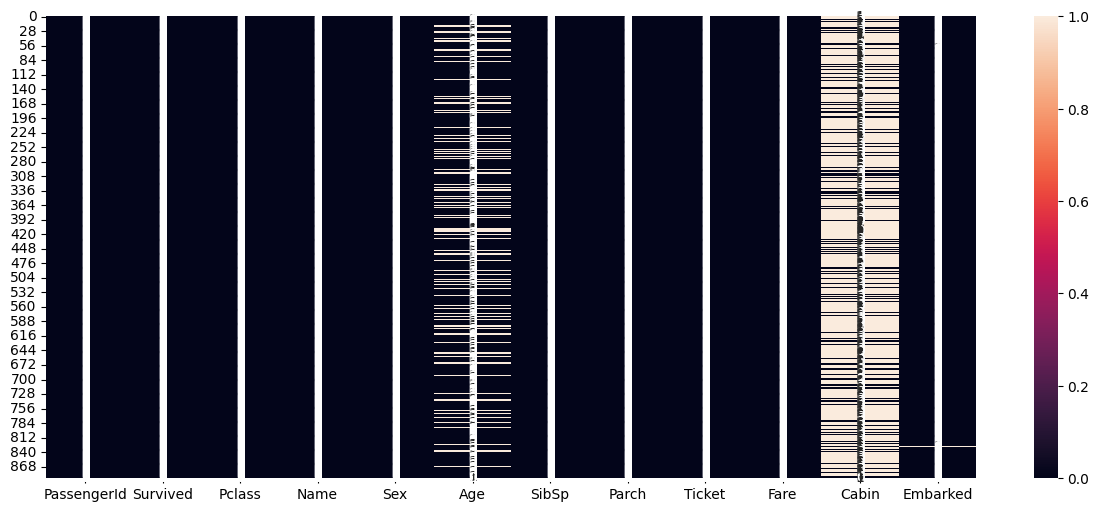

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.heatmap(tr.isnull(),annot=True)

In [5]:
n1=tr['Age'].isnull().sum()
n2=tr['Cabin'].isnull().sum()
n3=tr['Embarked'].isnull().sum()
print(n1,n2,n3)

177 687 2


Age, Embarked and Cabin contains null values, following steps will be done to take care of it:
1. Age column null values are comparitively less and the age column is an important feature (Conclusion by domain knowledge), so the null values will be 
   filled with the mean of the age values
2. Cabin column contains a lot of null values therefore dropping the column
3. Dropping null values from the embarked column

In [6]:
tr['Age']=tr['Age'].fillna(tr['Age'].mean())
tr=tr.drop(columns=['Cabin'],axis=1,inplace=False)
tr=tr.dropna(subset=['Embarked'])
tr.reset_index(drop=True)
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Dropping Name and Ticket column as they do not help the model

In [8]:
tr=tr.drop(columns=['Name','Ticket'],axis=1,inplace=False)
tr.reset_index(drop=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,887,0,2,male,27.000000,0,0,13.0000,S
885,888,1,1,female,19.000000,0,0,30.0000,S
886,889,0,3,female,29.699118,1,2,23.4500,S
887,890,1,1,male,26.000000,0,0,30.0000,C


Finding out unique values in the Sex column and changing those values to numeric (0 and 1)
0 -> Male
1 -> Female

In [9]:
print(tr['Sex'].unique())
tr['Sex']=tr['Sex'].apply(lambda x:0 if x=='male' else 1)
tr.head()

['male' 'female']


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [10]:
print(tr['Embarked'].isnull().any())
print(tr['Embarked'].unique())

False
['S' 'C' 'Q']


There are no null values and there are three unique characters

In [11]:
embarked_new=pd.get_dummies(tr['Embarked'],prefix='Embarked')
tr=pd.concat([tr,embarked_new],axis=1)
tr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,S,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,C,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,S,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,S,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,S,False,False,True


Converting the boolean values to Integer in Embarked, Embarked_C, Embarked_Q, Embarked_S columns and Dropping the Embarked column

In [12]:
tr['Embarked_C']=tr['Embarked_C'].astype(int)
tr['Embarked_Q']=tr['Embarked_Q'].astype(int)
tr['Embarked_S']=tr['Embarked_S'].astype(int)
tr=tr.drop(columns=['Embarked'],inplace=False,axis=1)
tr.reset_index(drop=True)
tr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


Cleaning and analyzing testing dataset

Basic Information about the testing dataset

In [13]:
print(te.shape)
print(te.info())

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


Finding Null values count and visualizing it using a heatmap

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

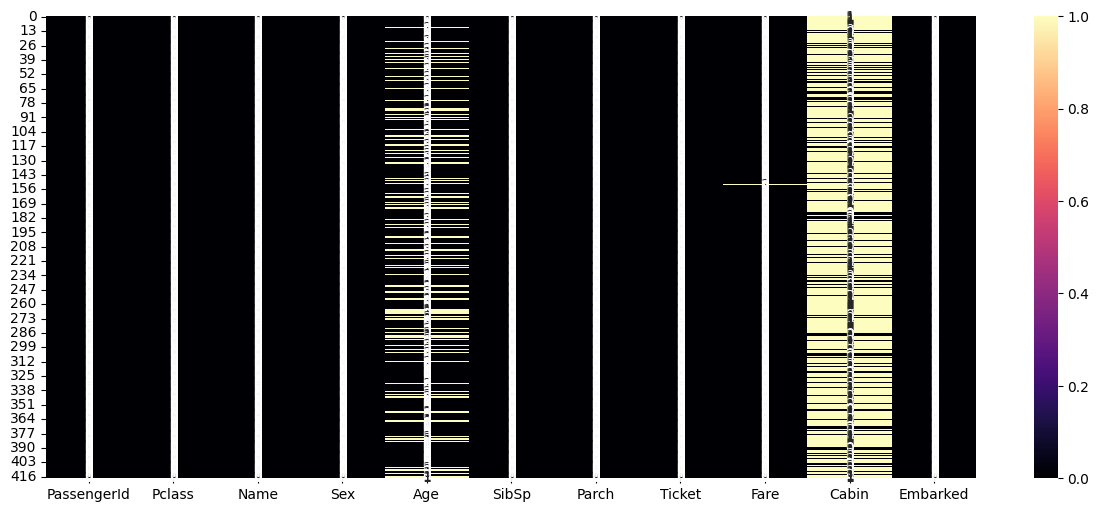

In [14]:
print(te.isnull().sum())
plt.figure(figsize=(15,6))
sns.heatmap(te.isnull(),annot=True,cmap='magma')

Null values are present in Age, Cabin and Fare columns, we take the following steps:
1. We fill the null values in the age column with the mean of the entire column
2. We fill the null values in the fare column with the median of the entire column
3. As there a lot of null values in the Cabin column, it does not contribute much to the model therefore we drop the entire column

In [15]:
te['Age']=te['Age'].fillna(te['Age'].mean())
te['Fare']=te['Fare'].fillna(te['Fare'].median())
te=te.drop(columns=['Cabin'],inplace=False,axis=1)
te.reset_index(drop=True)
te.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [16]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


Dropping Name and Ticket column as they do not help the model

In [17]:
te=te.drop(columns=['Name','Ticket'],axis=1,inplace=False)
te.reset_index(drop=True)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,Q
1,893,3,female,47.00000,1,0,7.0000,S
2,894,2,male,62.00000,0,0,9.6875,Q
3,895,3,male,27.00000,0,0,8.6625,S
4,896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S
414,1306,1,female,39.00000,0,0,108.9000,C
415,1307,3,male,38.50000,0,0,7.2500,S
416,1308,3,male,30.27259,0,0,8.0500,S


Finding out unique values in the Sex column and changing those values to numeric (0 and 1)
0 -> Male
1 -> Female

In [18]:
print(te['Sex'].unique())
te['Sex']=te['Sex'].apply(lambda x:0 if x=='male' else 1)
te.head()

['male' 'female']


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S


The Embarked column contains Characters , we will analyse the column by following these steps:
1. Check for any Null values, if Yes then drop those records (Already done)
2. Find Number of unique characters in the column
3. If there are a lot >10 drop the column else Convert each of these characters to columns and assign the records 0 or 1 values 
   indicating whether the character is present for that particular record or not (0 -> Present 1-> Not Present)

In [19]:
print(te['Embarked'].isnull().any())
print(te['Embarked'].unique())

False
['Q' 'S' 'C']


There are no null values and there are three unique characters

In [20]:
embarked_new=pd.get_dummies(te['Embarked'],prefix='Embarked')
te=pd.concat([te,embarked_new],axis=1)
te.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,Q,False,True,False
1,893,3,1,47.0,1,0,7.0000,S,False,False,True
2,894,2,0,62.0,0,0,9.6875,Q,False,True,False
3,895,3,0,27.0,0,0,8.6625,S,False,False,True
4,896,3,1,22.0,1,1,12.2875,S,False,False,True


Converting the boolean values to Integer in Embarked, Embarked_C, Embarked_Q, Embarked_S columns and Dropping the Embarked column

In [21]:
te['Embarked_C']=te['Embarked_C'].astype(int)
te['Embarked_Q']=te['Embarked_Q'].astype(int)
te['Embarked_S']=te['Embarked_S'].astype(int)
te=te.drop(columns=['Embarked'],inplace=False,axis=1)
te.reset_index(drop=True)
te.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


Seperating target variable from the training dataset

In [22]:
tr_x=tr.drop(columns=['Survived'])
tr_y=tr['Survived']

preprocessing the training dataset (Scaling the training and testing data)

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
print(ss)
tr_x=ss.fit_transform(tr_x)
temp_te=te.copy()
te=ss.transform(te)

StandardScaler()


In [24]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg

LogisticRegression()

In [2]:
from sklearn.model_selection import GridSearchCV
l=[i for i in range(1,10000,50)]
mi=[i for i in range(1,501,50)]
parameters={'penalty':['l1','l2','elasticnet'],'C':list(l),'max_iter':list(mi),'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']}
creg=GridSearchCV(lreg,scoring='accuracy',cv=10,param_grid=parameters)
creg.fit(tr_x,tr_y)

NameError: name 'lreg' is not defined

In [26]:
print(creg.best_params_)
print(creg.best_score_)

{'C': 1951, 'max_iter': 1, 'penalty': 'l1', 'solver': 'saga'}
0.8054392236976508
